In [19]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import pylab as pl
import sift.sift as SIFT
from sklearn.metrics import confusion_matrix,accuracy_score
train_path="dataset/debug"
class_names=os.listdir(train_path)

### просто добавляем датасет

In [20]:
image_paths=[]
image_classes=[]

def img_list(path):
    return (os.path.join(path,f) for f in os.listdir(path))

for training_name in class_names:
    dir_=os.path.join(train_path,training_name)
    print(dir_)
    class_path=img_list(dir_)
    image_paths+=class_path
    
image_classes_0=[0]*(len(image_paths)//2)
image_classes_1=[1]*(len(image_paths)//2)
image_classes=image_classes_0+image_classes_1

D = []

for i in range(len(image_paths)):
    D.append((image_paths[i],image_classes[i]))
    
print(D)
    
dataset = D
train = dataset[:15]
test = dataset[15:]

image_paths, y_train = zip(*train)
print(image_paths)
image_paths_test, y_test = zip(*test)

dataset/debug\cat
dataset/debug\dog
[('dataset/debug\\cat\\cat1.jpg', 0), ('dataset/debug\\cat\\cat10.jpg', 0), ('dataset/debug\\cat\\cat2.jpg', 0), ('dataset/debug\\cat\\cat3.jpg', 0), ('dataset/debug\\cat\\cat4.jpg', 0), ('dataset/debug\\cat\\cat5.jpg', 0), ('dataset/debug\\cat\\cat6.jpg', 0), ('dataset/debug\\cat\\cat7.jpg', 0), ('dataset/debug\\cat\\cat8.jpg', 0), ('dataset/debug\\cat\\cat9.jpg', 0), ('dataset/debug\\dog\\dog1.jpg', 1), ('dataset/debug\\dog\\dog10.jpg', 1), ('dataset/debug\\dog\\dog2.jpg', 1), ('dataset/debug\\dog\\dog3.jpg', 1), ('dataset/debug\\dog\\dog4.jpg', 1), ('dataset/debug\\dog\\dog5.jpg', 1), ('dataset/debug\\dog\\dog6.jpg', 1), ('dataset/debug\\dog\\dog7.jpg', 1), ('dataset/debug\\dog\\dog8.jpg', 1), ('dataset/debug\\dog\\dog9.jpg', 1)]
('dataset/debug\\cat\\cat1.jpg', 'dataset/debug\\cat\\cat10.jpg', 'dataset/debug\\cat\\cat2.jpg', 'dataset/debug\\cat\\cat3.jpg', 'dataset/debug\\cat\\cat4.jpg', 'dataset/debug\\cat\\cat5.jpg', 'dataset/debug\\cat\\cat6.j

### Извлечение признаков при помощи ORB

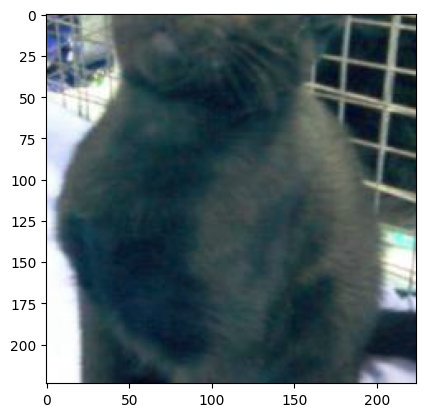

In [21]:
des_list=[]
orb=cv2.SIFT_create()
image=cv2.imread(image_paths[5])
plt.imshow(image)

### Функция внесения ключевых точек

In [22]:
def draw_keypoints(vis, keypoints, color = (0, 255, 255)):
    for kp in keypoints:
            x, y = kp.pt
            plt.imshow(cv2.circle(vis, (int(x), int(y)), 2, color))

### Нанесение ключевых точек

(< cv2.KeyPoint 0000020D2B21BCC0>, < cv2.KeyPoint 0000020D2B2F3C30>, < cv2.KeyPoint 0000020D2B2F3540>, < cv2.KeyPoint 0000020D2B2F3D20>, < cv2.KeyPoint 0000020D2B2F39C0>, < cv2.KeyPoint 0000020D32D47210>, < cv2.KeyPoint 0000020D32D696E0>, < cv2.KeyPoint 0000020D32D68FF0>, < cv2.KeyPoint 0000020D32D69A70>, < cv2.KeyPoint 0000020D32D68BA0>, < cv2.KeyPoint 0000020D32D69620>, < cv2.KeyPoint 0000020D32D69AA0>, < cv2.KeyPoint 0000020D32D699B0>, < cv2.KeyPoint 0000020D32D68A80>, < cv2.KeyPoint 0000020D32D694D0>, < cv2.KeyPoint 0000020D32D68F00>, < cv2.KeyPoint 0000020D32D695F0>, < cv2.KeyPoint 0000020D32D698F0>, < cv2.KeyPoint 0000020D32D68930>, < cv2.KeyPoint 0000020D32D69800>, < cv2.KeyPoint 0000020D32D68D20>, < cv2.KeyPoint 0000020D32D690E0>, < cv2.KeyPoint 0000020D32D69140>, < cv2.KeyPoint 0000020D32D69470>, < cv2.KeyPoint 0000020D32D69980>, < cv2.KeyPoint 0000020D32D69920>, < cv2.KeyPoint 0000020D32D69740>, < cv2.KeyPoint 0000020D32D697D0>, < cv2.KeyPoint 0000020D2B2E8A80>, < cv2.KeyPoin

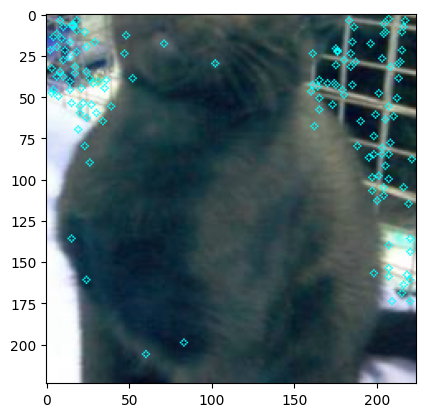

In [23]:
kp = orb.detect(image,None)
print(kp)
kp, des = orb.compute(image, kp)
print(kp)
img=draw_keypoints(image, kp)

### Добавление дескрипторов обучающих изображений в список

In [24]:
for image_path in image_paths:
    im=cv2.imread(image_path)
    kp=orb.detect(im,None)
    keypoints, descriptor= orb.compute(im, kp)
    des_list.append((image_path, descriptor))
    

In [25]:
descriptors=des_list[0][1]
for image_path, descriptor in des_list[1:]:
    descriptors=np.vstack((descriptors,descriptor))
    print(descriptors)
    
descriptors_float=descriptors.astype(float)

[[19.  0.  0. ... 13. 51. 53.]
 [50. 17. 81. ...  9.  0.  0.]
 [18.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  2. 28. ...  0.  0.  0.]
 [ 0.  4. 11. ...  0.  0.  5.]
 [ 0.  7.  7. ...  0.  0.  4.]]
[[ 19.   0.   0. ...  13.  51.  53.]
 [ 50.  17.  81. ...   9.   0.   0.]
 [ 18.   0.   0. ...   0.   0.   0.]
 ...
 [ 39.   3.   0. ...   9.  35.   2.]
 [ 41.   8.   0. ...   2.  13.   7.]
 [136.  15.   2. ...   0.   0.   0.]]
[[19.  0.  0. ... 13. 51. 53.]
 [50. 17. 81. ...  9.  0.  0.]
 [18.  0.  0. ...  0.  0.  0.]
 ...
 [ 1.  8. 47. ... 25. 64. 52.]
 [94. 24.  3. ...  0.  3. 27.]
 [15.  8. 17. ...  0.  0.  7.]]
[[19.  0.  0. ... 13. 51. 53.]
 [50. 17. 81. ...  9.  0.  0.]
 [18.  0.  0. ...  0.  0.  0.]
 ...
 [21.  0.  0. ...  0.  1. 37.]
 [59.  9.  0. ...  1.  0.  0.]
 [21.  0.  0. ...  2.  1.  0.]]
[[19.  0.  0. ... 13. 51. 53.]
 [50. 17. 81. ...  9.  0.  0.]
 [18.  0.  0. ...  0.  0.  0.]
 ...
 [ 6. 47.  3. ...  0.  0.  0.]
 [ 0.  0.  0. ...  3.  0.  0.]
 [ 0.  0.  3. ...  0.  0.  0.]]
[[19

### Выполнение кластеризации K-средних по дескрипторам

In [26]:
from scipy.cluster.vq import kmeans,vq

k=50
voc,variance=kmeans(descriptors_float,k,1)
print(voc, variance)

[[18.67883212 14.62773723 15.59854015 ... 11.93430657 11.67153285
  20.18978102]
 [24.02325581 19.08139535 16.20930233 ... 26.96511628 12.39534884
   9.3372093 ]
 [15.54081633 10.55612245  8.19897959 ...  2.9744898   2.40816327
  10.04081633]
 ...
 [12.02040816  7.55102041  5.34693878 ... 17.91836735 16.08163265
  21.95918367]
 [23.13131313 18.01010101 13.27272727 ...  9.67676768 13.42424242
  20.78787879]
 [16.79569892 14.30107527 20.31182796 ...  1.80645161  1.7311828
  21.39784946]] 292.3842799365901


### Создание гистограммы обучающего изображения


In [27]:
im_features=np.zeros((len(image_paths),k),"float32")
for i in range(len(image_paths)):
    words,distance=vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w]+=1
print(im_features)

[[ 2.  1.  3.  0.  1.  1.  1.  2.  0.  0.  0.  0.  0.  0.  2.  0.  0.  2.
   2.  2.  0.  3.  2.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  3.  1.  0.
   3.  1.  0.  6.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.]
 [ 3.  0.  0.  0.  3.  0.  0.  1.  0.  1.  7.  1.  0.  7.  1.  7.  2.  0.
   0.  3.  1.  0.  3.  0.  1.  0.  1.  1.  0.  3.  0.  0.  0.  2.  2.  7.
   1.  2.  0.  0.  1.  3.  1.  1.  0.  0.  0.  0.  4.  2.]
 [11.  0. 15.  4.  4.  2.  2.  0. 14.  2. 10. 14.  2.  6.  3. 15.  7.  6.
   2.  5.  4.  2.  0.  2.  1.  3.  5.  2.  2.  2.  1.  0.  0.  3.  0.  3.
   0.  2. 15.  1.  2. 13.  5.  0.  4.  1.  0.  3.  3.  6.]
 [ 7.  5. 18.  4. 10.  5.  5.  7. 14.  6. 10.  2.  4. 16.  4. 11.  6.  5.
   0.  7.  4.  5.  1.  4.  6.  2. 18.  2.  8.  4.  9.  5.  5.  6.  6.  4.
   2. 12.  1.  6.  0.  0. 19.  7.  7.  4.  6.  1. 13. 10.]
 [ 5.  7. 23.  8.  3.  3.  4.  4. 18.  8.  9.  9.  4. 20.  6.  1.  9.  4.
   0.  3.  3.  2.  2.  3.  5.  6. 12.  4.  4. 10.  4.  7.  5.  2.  6.  2.
   4.  7.  1. 10.  0.  1

### Применение стандартизации к функции обучения

In [28]:
from sklearn.preprocessing import StandardScaler
stdslr=StandardScaler().fit(im_features)
im_features=stdslr.transform(im_features)
print(im_features)

[[-0.7182017  -0.62844163 -1.161401   -1.1606889  -0.8883295  -0.7090628
  -0.9584387  -0.77150404 -1.4101012  -0.917663   -1.374104   -1.0948217
  -1.4517471  -1.2460935  -0.7175169  -0.8008161  -1.3273551  -0.69247705
  -0.28527504 -1.040833   -1.1576579  -0.05391639 -0.52527905 -1.0489298
  -1.0381745  -0.7242523  -1.0115464  -0.8059249  -1.1973814  -1.045995
  -0.6859943  -1.1767237  -0.595854   -0.39746645 -0.87465185 -0.76213974
  -0.24210006 -0.873069   -0.8934706   0.08757118 -0.6505771  -0.6713189
  -1.0330507  -0.9903328  -1.063236   -1.0364321  -0.8752137  -0.9106417
  -1.4767897  -1.6633685 ]
 [-0.6175192  -0.761211   -1.5075139  -1.1606889  -0.41243872 -1.0313641
  -1.1404207  -1.076045   -1.4101012  -0.72648317 -0.3285901  -0.9398941
  -1.4517471  -0.32468635 -0.91682714 -0.21688768 -0.86964643 -1.0072393
  -0.5803872  -0.64051265 -0.8300188  -1.2670351  -0.3576368  -1.0489298
  -0.79859567 -0.7242523  -1.0115464  -0.6773198  -1.1973814  -0.7049096
  -0.90036756 -1.176723

### Создание модели классификации с помощью SVM

In [29]:
from sklearn.svm import LinearSVC
clf=LinearSVC(max_iter=80000)
clf.fit(im_features,np.array(y_train))

c:\Users\kolos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(max_iter=80000)

### Тестирование модели классифкации

In [33]:
des_list_test=[]

for image_path in image_paths_test:
    image=cv2.imread(image_path)
    kp=orb.detect(image,None)
    keypoints_test,descriptor_test= orb.compute(image, kp)
    des_list_test.append((image_path,descriptor_test))
    
from scipy.cluster.vq import vq
test_features=np.zeros((len(image_paths_test),k),"float32")
for i in range(len(image_paths_test)):
    words,distance=vq(des_list_test[i][1],voc)
    for w in words:
        test_features[i][w]+=1

test_features=stdslr.transform(test_features)

true_classes=[]
for i in y_test:
    true_classes.append(i)
        
predict_classes=[]
for i in clf.predict(test_features):
    predict_classes.append(i)
print(clf.predict(test_features), true_classes)
accuracy=accuracy_score(true_classes, predict_classes)
print(accuracy)

[1 1 1 0 0] [1, 1, 1, 1, 1]
0.6
